一、个人数据

（一）数据分词、去除停用词；的分词结被写到新的输出文档中，同时存储在 data_set 列表。

In [1]:
import jieba
import re
import csv
import gensim
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')  # To ignore all warnings that arise here to enhance clarity

# 创建停用词列表
def stopwordslist():
    stopwords = [line.strip() for line in open('C:/Users/Administrator/Desktop/研究生一年级下/文本数据分析/停用词.txt', encoding='UTF-8').readlines()]
    return stopwords

def processing(text):
    text = re.sub("@.+?( |$)", "", text)           # 去除 @xxx (用户名)
    text = re.sub("【.+?】", "", text)             # 去除 【xx】 (里面的内容通常都不是用户自己写的)
    text = re.sub(".*?:", "", text)                # 去除微博用户的名字
    text = re.sub("#.*#", "", text)                # 去除话题引用
    text = re.sub("\n", "", text)                  # 去除换行符
    return text

# 对句子进行中文分词
def seg_depart(sentence):
    sentence_depart = jieba.cut(sentence.strip())
    stopwords = stopwordslist()        # 创建一个停用词列表
    outstr = ''                        # 输出结果为outstr
    for word in sentence_depart:       # 去停用词
        if word not in stopwords:
            if word != '\t':
                outstr += word
                outstr += " "
    return outstr

# 给出文档路径
filename = "C:/Users/Administrator/Desktop/研究生一年级下/文本数据分析/shengyu1.csv"   # 原文档路径
output_file_path = "C:/Users/Administrator/Desktop/研究生一年级下/文本数据分析/分词之后shengyu1.csv"

# 读取和处理CSV文件
data_set = []

try:
    with open(filename, 'r', encoding='ANSI') as csvfile:
        reader = csv.reader(csvfile, delimiter=',', quotechar='"', doublequote=False)
        with open(output_file_path, 'w', encoding='UTF-8') as outputs:
            for line in reader:
                text = processing(line[3])  # 微博在文档的第四列
                line_seg = seg_depart(text)
                data_set.append(line_seg.split())
                outputs.write(line_seg + '\n')
except UnicodeDecodeError:
    with open(filename, 'r', encoding='GBK') as csvfile:
        reader = csv.reader(csvfile, delimiter=',', quotechar='"', doublequote=False)
        with open(output_file_path, 'w', encoding='UTF-8') as outputs:
            for line in reader:
                text = processing(line[3])  # 微博在文档的第四列
                line_seg = seg_depart(text)
                data_set.append(line_seg.split())
                outputs.write(line_seg + '\n')

print("分词成功！！！")
print(data_set)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.579 seconds.
Prefix dict has been built successfully.


分词成功！！！
[['comment'], ['大过年', '想', '起来', '生气', '该死', '董狗', '男', '马上', '死', '别活', '2022', '年', '希望', '畜生', '除夕夜', '鞭炮', '炸死', '希望', '姐姐', '赶紧', '找到', '家人', '回家', '过年'], [], ['听', '春晚', '感想', '生育率', '低', '都', '福报'], ['徐州', '政府', '很', '想', '新年', '敢'], [], ['觉得', '发声', '都', '卑微', '当下', '…', '…', '…', '…', '…', '…', '…'], [], [], [], ['重复', '地说', '世界', '不要', '说', '快', '走', '疯子', '8', '孩子', '已经', '很', '好', '经常', '送饭', '困住', '男子', '说', '哪有什么', '男款', '女款', '穿', '保暖', '就行', '指着', '爱心', '人士', '寄给', '女', '冬款', '新', '衣服', '如今', '穿', '身上', '衣服', '说', '孩子', '顺其自然', '要个', '十几个', '挺', '好'], [], ['昨日', '明日', '只差', '闷棍'], [], [], [], [], ['持续', '曝光', '南京', '中院', '三', '法官', '滥用职权', '违法违纪', '拒', '不', '公布', '判决书'], [], ['调查', '这一', '事件', '该县', '内部', '情况', '做', '大', '调查', '相同', '遭遇', '女子', '请', '解救', '正义', '可能', '迟到', '请', '不要', '再', '缺席', '失职', '官员', '开除党籍', '黑势力', '保护伞', '严惩', '严办'], ['看来', '徐州', '不', '太行', '一位', '妈妈', '生', '出来', '八个', '宝宝', '随便', '搜索', '没有', '低估', '徐州'], ['春晚', '母语', '无语', '希望', '今天', '穿

（二）训练LDA模型

1.构建词典和语料库，训练LDA模型；并以coherence衡量主题质量，即计算在同一个主题下的词语之间的相似性
（较高值表明主题内的词语更具有一致性和相关性）

[(0, '0.022*"生育" + 0.017*"月" + 0.016*"年" + 0.008*"日" + 0.007*"没有" + 0.007*"人口" + 0.007*"政策" + 0.006*"国家" + 0.006*"工作" + 0.006*"1" + 0.006*"2023" + 0.006*"3" + 0.005*"家庭" + 0.005*"补贴" + 0.005*"提高"'), (1, '0.011*"老公" + 0.006*"白" + 0.005*"家" + 0.005*"去" + 0.005*"中" + 0.005*"回复" + 0.004*"人" + 0.004*"深圳" + 0.004*"小时" + 0.003*"不" + 0.003*"上" + 0.003*"回家" + 0.003*"说" + 0.003*"欲望" + 0.003*"试管婴儿"'), (2, '0.032*"生育" + 0.022*"不" + 0.020*"都" + 0.017*"孩子" + 0.015*"女性" + 0.015*"人" + 0.011*"生育率" + 0.011*"会" + 0.009*"结婚" + 0.009*"生" + 0.008*"说" + 0.007*"很" + 0.007*"没有" + 0.007*"上" + 0.007*"不是"'), (3, '0.022*"年" + 0.013*"月" + 0.010*"生育" + 0.009*"后" + 0.008*"岁" + 0.008*"8" + 0.007*"O" + 0.007*"子女" + 0.007*"10" + 0.007*"直接" + 0.006*"日" + 0.006*"单身" + 0.005*"人" + 0.005*"网页" + 0.005*"2"'), (4, '0.014*"1" + 0.007*"生育" + 0.007*"…" + 0.006*"2" + 0.006*"患者" + 0.006*"3" + 0.005*"头发" + 0.005*"100ml" + 0.004*"需求" + 0.004*"部位" + 0.004*"注意" + 0.004*"精油" + 0.004*"慢慢" + 0.004*"平衡" + 0.004*"时"'), (5, '0.009*"哈哈哈" + 0.

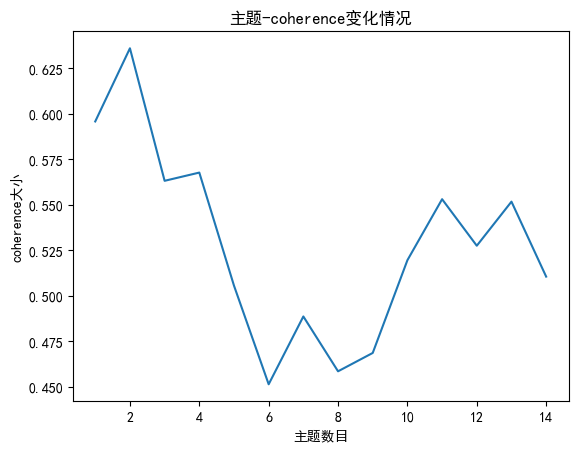

In [2]:
# 构建词典
dictionary = corpora.Dictionary(data_set)
#创建语料库，词袋表示
corpus = [dictionary.doc2bow(text) for text in data_set]

# 训练LDA模型
ldamodel = LdaModel(corpus, num_topics=10, id2word=dictionary, passes=30, random_state=1)
#corpus: 语料库，词袋表示；num_topics=10: 指定主题数量为 10；id2word=dictionary: 词典；passes=30: 运行多少次迭代来训练模型；random_state=1: 设定随机种子以复现结果。
print(ldamodel.print_topics(num_topics=10, num_words=15))

# 绘制主题-coherence变化情况
def coherence(num_topics):
#定义一个函数用于计算给定主题数量下的 coherence
    lda = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=30, random_state=1)
    coherence_model_lda = CoherenceModel(model=lda, texts=data_set, dictionary=dictionary, coherence='c_v')
    return coherence_model_lda.get_coherence()

x = range(1, 15)
#定义主题数量的范围
y = [coherence(i) for i in x]
#计算不同主题数量下的 coherence

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.plot(x, y)
plt.xlabel('主题数目')
plt.ylabel('coherence大小')
plt.title('主题-coherence变化情况')
plt.show()

In [6]:
from gensim.models import LdaModel
import pandas as pd
from gensim.corpora import Dictionary
from gensim import corpora, models
import csv
 
# 准备数据
PATH = "C:/Users/Administrator/Desktop/研究生一年级下/文本数据分析/分词之后shengyu1.csv"
 
file_object2=open(PATH,encoding = 'utf-8',errors = 'ignore').read().split('\n')  #一行行的读取内容
data_set=[] #建立存储分词的列表
for i in range(len(file_object2)):
    result=[]
    seg_list = file_object2[i].split()
    for w in seg_list :#读取每一行分词
        result.append(w)
    data_set.append(result)
 
dictionary = corpora.Dictionary(data_set)  # 构建词典
corpus = [dictionary.doc2bow(text) for text in data_set]
 
lda = LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, passes = 30,random_state=1)
topic_list=lda.print_topics()
print(topic_list)
 
for i in lda.get_document_topics(corpus)[:]:
    #遍历每个文档的主题分布
    listj=[]
    for j in i:
        listj.append(j[1])
        #将每个主题的概率值添加到listj列表中
    bz=listj.index(max(listj))
    # 找到概率值最大的主题的索引
    print(i[bz][0])
    #打印每个文档最可能的主题

[(0, '0.016*"生育" + 0.013*"月" + 0.012*"年" + 0.007*"日" + 0.007*"1" + 0.006*"没有" + 0.005*"国家" + 0.005*"政策" + 0.005*"2" + 0.005*"工作"'), (1, '0.016*"不" + 0.015*"都" + 0.014*"孩子" + 0.013*"生育" + 0.010*"说" + 0.010*"人" + 0.008*"没有" + 0.007*"很" + 0.006*"还" + 0.006*"生"'), (2, '0.019*"生育" + 0.014*"女性" + 0.008*"生育率" + 0.008*"人" + 0.007*"都" + 0.007*"会" + 0.007*"不" + 0.005*"男性" + 0.005*"社会" + 0.005*"不是"'), (3, '0.013*"年" + 0.008*"生育" + 0.006*"月" + 0.005*"直接" + 0.005*"O" + 0.005*"上海" + 0.005*"提高" + 0.005*"大" + 0.005*"8" + 0.005*"岁"'), (4, '0.007*"亲子鉴定" + 0.006*"1" + 0.006*"哈哈哈" + 0.005*"真实" + 0.004*"报" + 0.004*"本人" + 0.004*"全文" + 0.003*"年" + 0.003*"案例" + 0.003*"生育"')]
0
1
0
2
1
0
1
0
0
0
1
0
3
0
0
0
0
0
0
0
1
1
0
0
0
0
1
4
1
0
1
1
0
0
0
0
2
1
1
0
0
0
1
1
0
3
0
0
1
0
0
1
0
1
0
0
0
1
0
3
0
0
1
3
1
2
2
0
0
0
2
2
2
0
0
1
0
2
0
0
0
2
1
0
2
0
3
3
2
1
0
0
0
0
1
0
0
0
1
0
1
1
0
0
0
0
1
3
0
1
1
4
0
0
4
2
1
1
1
0
2
0
4
4
3
4
0
1
1
0
0
0
0
0
0
2
0
0
0
2
4
2
0
0
2
2
0
0
0
3
0
1
0
1
1
0
1
0
4
4
1
0
1
2
0
0
4
1
0
0


（三）使用pyLDAvis库以可视化LDA模型

In [7]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
data = pyLDAvis.gensim.prepare(lda, corpus, dictionary)
pyLDAvis.save_html(data, 'C:/Users/Administrator/Desktop/研究生一年级下/文本数据分析/topicshengyu1.html')

In [8]:
import pyLDAvis.gensim_models as gensimvis
lda_vis = gensimvis.prepare(lda, corpus, dictionary) 
#使用gensimvis库的prepare函数准备可视化数据；其中lda是已经训练好的LDA模型，corpus是文档的词袋表示，dictionary是词典
pyLDAvis.display(lda_vis)

（四）LDA结果分析
可视化结果反映了生育相关文本中的潜在主题：
主题1主要讲述生育过程中的家庭分工问题，关注男性和女性在生育和抚育孩子的过程中担当的责任和角色；
主题2主要讲述生育议题的宏观环境，关注生育率问题、中外生育国情对比等议题；
主题3主要讲述生育相关的国家政策和公司规定，关注生育补贴、五险一金、住房、医疗等议题；
主题4主要讲述生育和婚姻相关的法规问题，关注结婚登记、离婚状况、法院判决等议题；
主题5主要讲述生育体验和感受，兼有正负两个方面。

二、课程案例

In [9]:
import pandas as pd     # 数据表
import numpy as np     # 数组
import re     # 正则表达式
import jieba     # 中文分词
import matplotlib.pyplot as plt     # 画图
from gensim import corpora, models
import pyLDAvis     # 交互式LDA可视化
import pyLDAvis.gensim_models as gensimvis

In [10]:
df = pd.read_excel('text_analysis_weibo_sample.xlsx', index_col = 0)

In [11]:
df.head()

,index,标题/微博内容,点赞,转发,评论,账号昵称UID加密,粉丝数,关注数,地域
0,34121,国债：地产行业重磅利好提振风险偏好，期债低开低走 国债期货全线收跌，10年期主力...,0,0,0,e5df796860e68f403bcf9651bab4d42e,0,0,其他
1,40230,#喜迎二十大 忠诚保平安#,0,0,0,6e35cb69ad52f20de5e28197b2e85306,405444,252,广西
2,7714,注意！事关明日教资考试！福建省教育考试院发布补充公告 福建省2022年下半年全国中小学教师...,0,0,0,e6953217442e6c06a7af23eee5e185f2,53264,2177,福建
3,27378,近日，“千年大计”雄安新区迎来五周岁生日。从“一张白纸...,0,0,0,NaN,0,0,北京
4,15435,樊振东牛逼！,0,0,0,344af41eac516375c04dee6325e763cc,8,51,山东


（一）语料预处理

1.剔除符号和数字

In [12]:
def remove_nums(text):
    nonums = re.sub('[^\u4e00-\u9fa5]+', '', text)
    return nonums
test = df['标题/微博内容'][0]
remove_nums(test)[:100]

'国债地产行业重磅利好提振风险偏好期债低开低走国债期货全线收跌年期主力合约跌年期主力合约跌年期主力合约跌三大主力合约均创逾一年收盘新低行情解读公开市场方面央行开展了亿元天期逆回购操作中标利率亿元逆回购到'

2.分词

In [13]:
# 加载中文停用词词典，可个性化设置
# stopwords = open('stopwords.txt', encoding = 'utf-8').read()

def clean_text(text):
    words = jieba.lcut(text)
    # words = [w for w in words if w not in stopwords and w!='[' and w!=']']
    return ' '.join(words)

test = df['标题/微博内容'][0]
clean_text(test)

'    国债 ： 地产 行业 重磅 利好 提振 风险 偏好 ， 期债 低开 低 走           国债 期货 全线 收跌 ， 10 年期 主力 合约 跌 0.37% ， 5 年期 主力 合约 跌 0.24% ， 2 年期 主力 合约 跌 0.11% ， 三大 主力 合约 均 创 逾 一年 收盘 新低 。         行情 解读 ：         1 ， 公开市场 方面 ， 央行 开展 了 800 亿元 7 天期 逆 回购 操作 ， 中标 利率 2.0% ， 20 亿元 逆 回购 到期 ， 因此 当日 净 投放 780 亿元 。         2 ， 资金面 方面 ， 央行 公开市场 逆 回购 继续 加力 ， 不过 银行 间 市场 周二 资金 供给 趋于 收敛 ， 七天 回购 加权 利率 进一步 上行 。 长期 资金 方面 ， 全国 和 主要 股份制 银行 一年期 同业 存单 报价 仍 维持 在 2.45% 水平 ， 不过 目前 尚无 成交量 配合 。         3 ， 房地产 行业 再度 迎来 重磅 利好 。 证监会 宣布 在 涉房 企业 股权 融资 方面 调整 优化 五项 措施 ， 并 自即日起 施行 。 随着 证监会 支持 房企 股权 融资 这 “ 第三支 箭 ” 正式 发射 ， 信贷 、 债券 、 股权 三个 融资 渠道 “ 三箭 齐发 ” ， 合力 推动 房地产 融资 。 — — “ 第三支 箭 ” 快速 落地 ， 或 将 为 房地产 行业 注入 较 大规模 的 增量 资金 和 资产 ， 促进 行业 平稳 健康 发展 。 在 短短 20 天 的 时间 内 政策 端 “ 三箭 齐发 ” 强势 托底 ， 提振 各方 的 信心 。 看好 全 行业 的 信用 复苏 以及 在 因城 施策 空间 逐步 打开 下 的 销售 回暖 。         4 ， 国务院 联防 联控 机制 11 月 29 日 15 : 00 召开 新闻 发布会 。 针对 “ 考虑 到 最近 个别 地方 的 不满情绪 ， 政府 是否 会 重新考虑 疫情 应对 政策 ” 的 问题 ， 国家 卫生 健康 委 新闻 发言人 、 宣传司 副司长 米锋 称 ， 疫情 发生 以来 ， 中国政府 一直 根据 病毒 变异 的 特点 和 临床 治疗 的 实践 认识 ， 边 防控 、 边 研究 

In [14]:
df['标题/微博内容'] = df['标题/微博内容'].astype(str)
df['微博内容分词'] = df['标题/微博内容'].apply(remove_nums)
df['微博内容分词'] = df['微博内容分词'].apply(clean_text)
df['微博内容分词'] = df['微博内容分词'].apply(lambda x: x.split())
df

,index,标题/微博内容,点赞,转发,评论,账号昵称UID加密,粉丝数,关注数,地域,微博内容分词
0,34121,国债：地产行业重磅利好提振风险偏好，期债低开低走 国债期货全线收跌，10年期主力...,0,0,0,e5df796860e68f403bcf9651bab4d42e,0,0,其他,"[国债, 地产, 行业, 重磅, 利好, 提振, 风险, 偏好, 期债, 低开, 低, 走,..."
1,40230,#喜迎二十大 忠诚保平安#,0,0,0,6e35cb69ad52f20de5e28197b2e85306,405444,252,广西,"[喜迎, 二十大, 忠诚, 保平安]"
2,7714,注意！事关明日教资考试！福建省教育考试院发布补充公告 福建省2022年下半年全国中小学教师...,0,0,0,e6953217442e6c06a7af23eee5e185f2,53264,2177,福建,"[注意, 事关, 明日, 教资, 考试, 福建省, 教育, 考试院, 发布, 补充, 公告,..."
3,27378,近日，“千年大计”雄安新区迎来五周岁生日。从“一张白纸...,0,0,0,NaN,0,0,北京,"[近日, 千年, 大计, 雄安, 新区, 迎来, 五周岁, 生日, 从, 一张白纸, 到, ..."
4,15435,樊振东牛逼！,0,0,0,344af41eac516375c04dee6325e763cc,8,51,山东,"[樊振东, 牛, 逼]"
...,...,...,...,...,...,...,...,...,...,...
95,14034,老公好漂亮[舔屏],0,0,0,aa7af97ae98cbe8983e559b948ecfabf,825,191,北京,"[老公, 好, 漂亮, 舔, 屏]"
96,35249,恭喜@张小娜呀娜 1名用户获得【小飞T】。C官方唯一抽奖工具@C抽奖平台 对本次抽奖进行监督...,0,0,2,f538513e5801c275cbcf285517a8ee62,51709,20,北京,"[恭喜, 张小娜, 呀, 娜, 名, 用户, 获得, 小飞, 官方, 唯一, 抽奖, 工具,..."
97,39598,接不动了，居民部门负债率提升空间太有限了。现在动辄几万一平米，总价高，月供高，预期转差，还怎...,0,0,0,2e76c39b6665a0b6f5bdc4c35f36f573,0,59,四川,"[接不动, 了, 居民, 部门, 负债率, 提升, 空间, 太, 有限, 了, 现在, 动辄..."
98,48977,目前电子烟政策已从制定阶段逐渐走向实施阶段，而主要的电子烟公司股价下跌幅度高达70%-...,0,0,0,NaN,0,0,北京,"[目前, 电子, 烟, 政策, 已, 从, 制定, 阶段, 逐渐, 走向, 实施, 阶段, ..."


（二）LDA主题模型

In [15]:
dictionary = corpora.Dictionary(df['微博内容分词'])     # 根据分词结果创建字典
corpus = [dictionary.doc2bow(text) for text in df['微博内容分词']]     # 根据分词结果创建语料库

In [17]:
# 训练LDA模型
lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

In [18]:
# 查看主题
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

(0, '0.027*"的" + 0.019*"电子" + 0.019*"烟" + 0.010*"考生" + 0.007*"在"')
(1, '0.040*"的" + 0.011*"在" + 0.010*"了" + 0.007*"郑州" + 0.007*"数字"')
(2, '0.016*"的" + 0.016*"月" + 0.013*"万吨" + 0.009*"市场" + 0.008*"日"')
(3, '0.034*"的" + 0.007*"在" + 0.007*"和" + 0.006*"了" + 0.006*"中国"')
(4, '0.003*"去" + 0.003*"转发" + 0.002*"了" + 0.002*"是" + 0.002*"你"')


In [19]:
df['微博内容分词'].iloc[0]

['国债',
 '地产',
 '行业',
 '重磅',
 '利好',
 '提振',
 '风险',
 '偏好',
 '期债',
 '低开',
 '低',
 '走',
 '国债',
 '期货',
 '全线',
 '收跌',
 '年期',
 '主力',
 '合约',
 '跌',
 '年期',
 '主力',
 '合约',
 '跌',
 '年期',
 '主力',
 '合约',
 '跌三大',
 '主力',
 '合约',
 '均',
 '创',
 '逾',
 '一年',
 '收盘',
 '新低',
 '行情',
 '解读',
 '公开市场',
 '方面',
 '央行',
 '开展',
 '了',
 '亿元',
 '天期',
 '逆',
 '回购',
 '操作',
 '中标',
 '利率',
 '亿元',
 '逆',
 '回购',
 '到期',
 '因此',
 '当日',
 '净',
 '投放',
 '亿元',
 '资金面',
 '方面',
 '央行',
 '公开市场',
 '逆',
 '回购',
 '继续',
 '加力',
 '不过',
 '银行',
 '间',
 '市场',
 '周二',
 '资金',
 '供给',
 '趋于',
 '收敛',
 '七天',
 '回购',
 '加权',
 '利率',
 '进一步',
 '上行',
 '长期',
 '资金',
 '方面',
 '全国',
 '和',
 '主要',
 '股份制',
 '银行',
 '一年期',
 '同业',
 '存单',
 '报价',
 '仍',
 '维持',
 '在',
 '水平',
 '不过',
 '目前',
 '尚无',
 '成交量',
 '配合',
 '房地产',
 '行业',
 '再度',
 '迎来',
 '重磅',
 '利好',
 '证监会',
 '宣布',
 '在',
 '涉房',
 '企业',
 '股权',
 '融资',
 '方面',
 '调整',
 '优化',
 '五项',
 '措施',
 '并',
 '自即日起',
 '施行',
 '随着',
 '证监会',
 '支持',
 '房企',
 '股权',
 '融资',
 '这',
 '第三支',
 '箭',
 '正式',
 '发射',
 '信贷',
 '债券',
 '股权',
 '三个',
 '融资',
 '渠道',
 '三箭',
 '齐发',
 '合

In [20]:
for index, score in sorted(lda_model[corpus[0]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.9797630906105042	 
Topic: 0.034*"的" + 0.007*"在" + 0.007*"和" + 0.006*"了" + 0.006*"中国" + 0.005*"公司" + 0.005*"重庆" + 0.005*"经济" + 0.005*"期货" + 0.004*"增长"

Score: 0.019807079806923866	 
Topic: 0.016*"的" + 0.016*"月" + 0.013*"万吨" + 0.009*"市场" + 0.008*"日" + 0.008*"库存" + 0.007*"较" + 0.006*"需求" + 0.006*"预期" + 0.006*"下降"


In [21]:
documents = df['微博内容分词'].values

In [22]:
# Function to infer topics for a document
def infer_topics(lda_model, document):
    bow = dictionary.doc2bow(document)
    topics = lda_model.get_document_topics(bow)
    return topics

# Print topics for each document
for i, doc in enumerate(documents[:10]):
    doc_topics = infer_topics(lda_model, doc)
    print(f"Document {i+1}:")
    print(doc_topics)
    print()

Document 1:
[(2, 0.019806953), (3, 0.9797632)]

Document 2:
[(0, 0.040049545), (1, 0.040045507), (2, 0.040042043), (3, 0.8397865), (4, 0.04007639)]

Document 3:
[(0, 0.9974002)]

Document 4:
[(1, 0.9993363)]

Document 5:
[(0, 0.050824713), (1, 0.050525635), (2, 0.05005266), (3, 0.79850173), (4, 0.05009529)]

Document 6:
[(0, 0.022319231), (1, 0.02240338), (2, 0.022751607), (3, 0.9102709), (4, 0.022254802)]

Document 7:
[(0, 0.012586336), (1, 0.012716077), (2, 0.9492813), (3, 0.01263554), (4, 0.012780796)]

Document 8:
[(0, 0.100956164), (1, 0.10036406), (2, 0.59795797), (3, 0.100712776), (4, 0.100009024)]

Document 9:
[(0, 0.9719277)]

Document 10:
[(1, 0.99933887)]



（三）可视化

In [23]:
lda_vis = gensimvis.prepare(lda_model, corpus, dictionary, n_jobs=1) # 备注：上述语句如果在数据量比较大的时候跑不出来，可以选择加一个n_jobs=1的参数，降低计算量，避免报错
# 显示可视化界面
pyLDAvis.display(lda_vis)

In [24]:
# 导出可视化结果到html
pyLDAvis.save_html(lda_vis, 'lda_visualization.html')